In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

# Raw Data

In [10]:
dataset_raw = pd.read_csv('dataset.csv')
dataset_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Raw Data Preprocessing

In [12]:
dataset_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [14]:
dataset = dataset_raw.drop(['Model'], axis=1)
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing Values

In [15]:
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [17]:
# Rule of thumb:
# If you are removing <5% of observations, you are free to remove all observations that have missing values

dataset = dataset.dropna(axis = 0)
dataset.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [19]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Probability Distribution Function (PDF)

<Axes: xlabel='Price', ylabel='Count'>

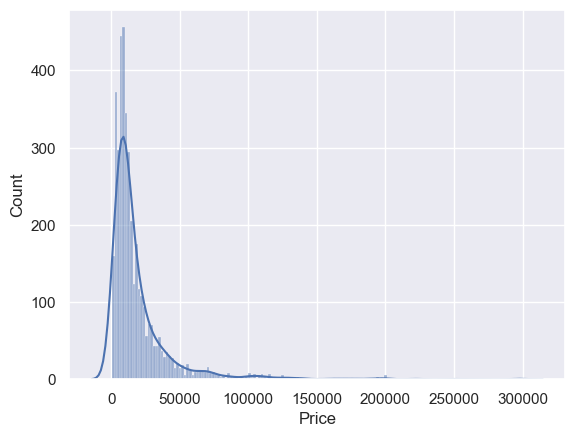

In [34]:
sns.histplot(dataset['Price'], kde=True, kde_kws=dict(cut=3))

#### Dealing with outliers

In [35]:
q = dataset['Price'].quantile(0.99)
dataset = dataset[dataset['Price']<q]
dataset.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


<Axes: xlabel='Price', ylabel='Count'>

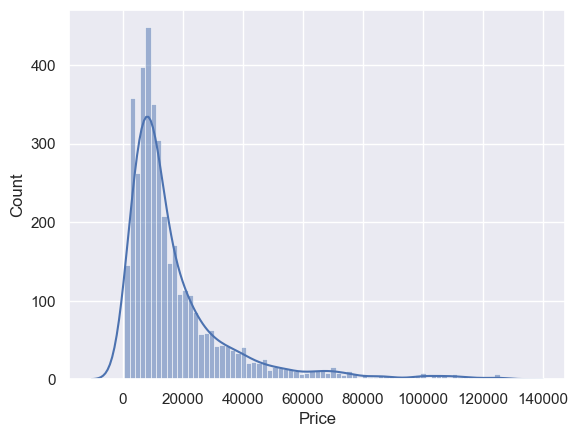

In [36]:
sns.histplot(dataset['Price'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='Mileage', ylabel='Count'>

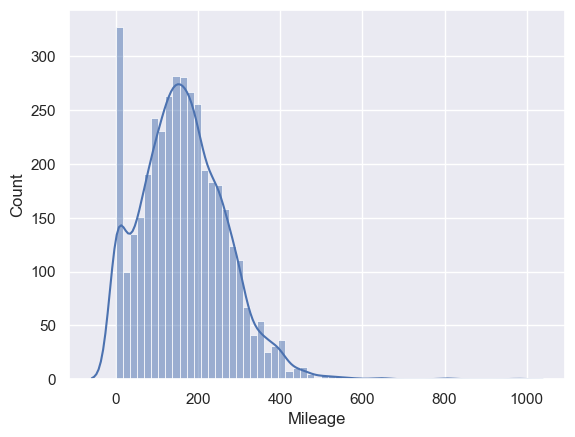

In [38]:
sns.histplot(dataset['Mileage'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='Mileage', ylabel='Count'>

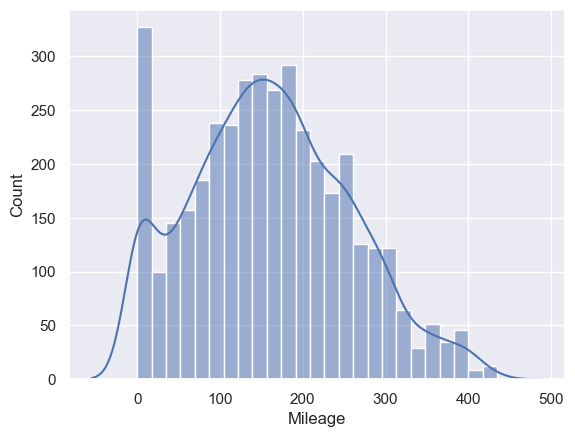

In [39]:
q = dataset['Mileage'].quantile(0.99)
dataset = dataset[dataset['Mileage']<q]
sns.histplot(dataset['Mileage'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='EngineV', ylabel='Count'>

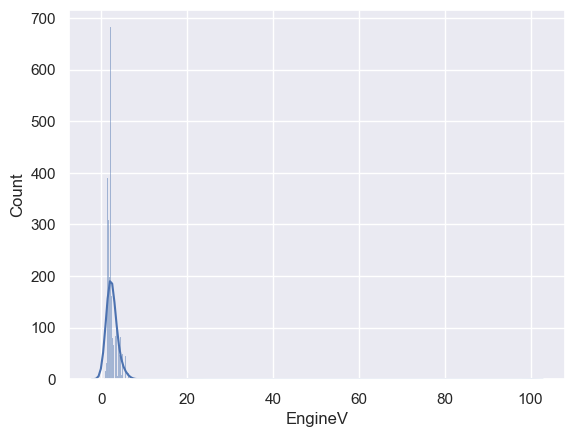

In [43]:
sns.histplot(dataset['EngineV'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='EngineV', ylabel='Count'>

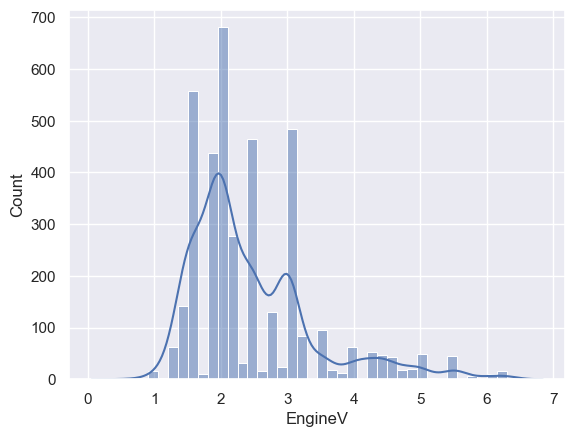

In [47]:
dataset = dataset[dataset['EngineV'] < 6.5]
sns.histplot(dataset['EngineV'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='Year', ylabel='Count'>

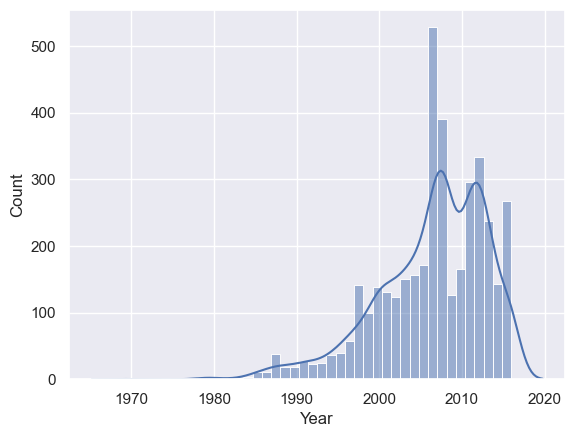

In [48]:
sns.histplot(dataset['Year'], kde=True, kde_kws=dict(cut=3))

<Axes: xlabel='Year', ylabel='Count'>

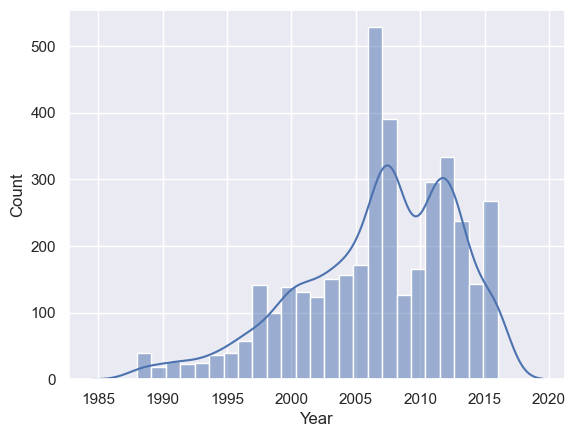

In [49]:
q = dataset['Year'].quantile(0.01)
dataset = dataset[dataset['Year']>q]
sns.histplot(dataset['Year'], kde=True, kde_kws=dict(cut=3))

In [51]:
dataset = dataset.reset_index(drop=True)
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS Assumptions

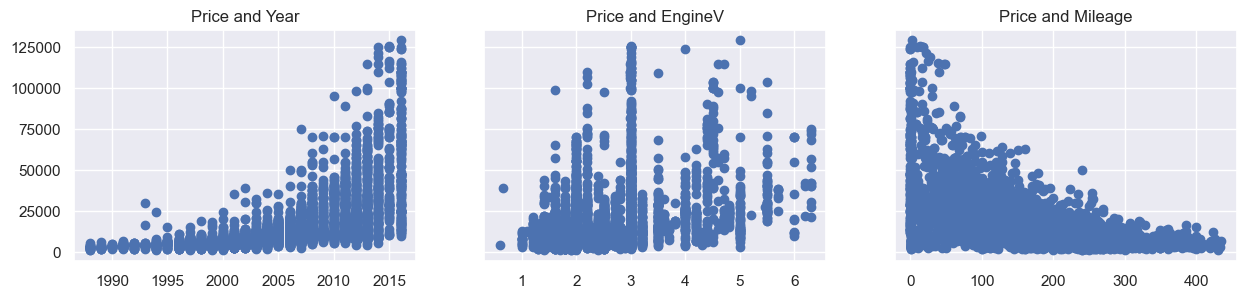

In [55]:
f, (ax1, ax2, ax3) = plot.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(dataset['Year'], dataset['Price'])
ax1.set_title('Price and Year')
ax2.scatter(dataset['EngineV'], dataset['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(dataset['Mileage'], dataset['Price'])
ax3.set_title('Price and Mileage')

plot.show()

#### The relations are NOT Linear!
That is beacause the Price itself is not normally distributed

<Axes: xlabel='Price', ylabel='Count'>

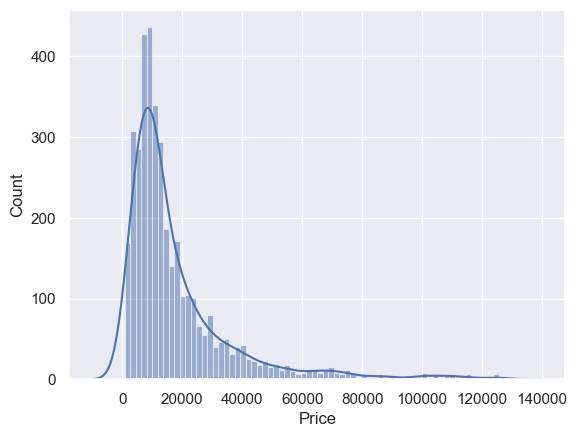

In [56]:
sns.histplot(dataset['Price'], kde=True, kde_kws=dict(cut=3))

In [58]:
log_price = np.log(dataset['Price'])
dataset['log_Price'] = log_price
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


<Axes: xlabel='log_Price', ylabel='Count'>

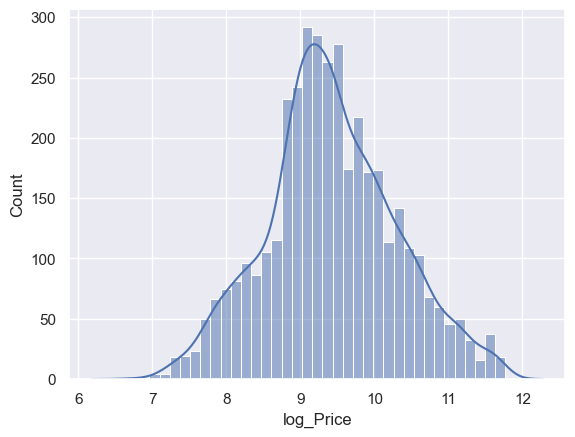

In [59]:
sns.histplot(dataset['log_Price'], kde=True, kde_kws=dict(cut=3))

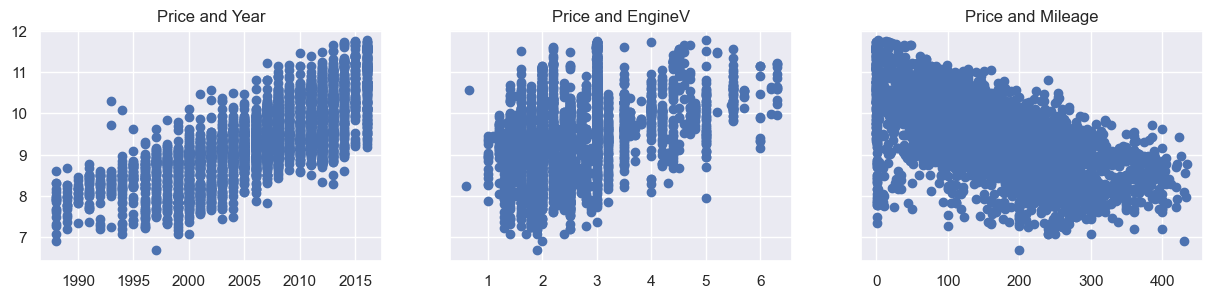

In [60]:
f, (ax1, ax2, ax3) = plot.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(dataset['Year'], dataset['log_Price'])
ax1.set_title('Price and Year')
ax2.scatter(dataset['EngineV'], dataset['log_Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(dataset['Mileage'], dataset['log_Price'])
ax3.set_title('Price and Mileage')

plot.show()

In [61]:
dataset = dataset.drop(['Price'], axis=1)
dataset.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### Multicollinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = dataset[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [63]:
vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [64]:
data_no_multi = dataset.drop(['Year'], axis=1)

## Dummy Variables

In [65]:
data_dummies = pd.get_dummies(data_no_multi, drop_first=True)

In [66]:
data_dummies.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange Data Frame

In [71]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [72]:
cols = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [74]:
data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


# Standardization

### Declare inputs and targets

In [75]:
target = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'], axis=1)
# independent variables are all variables excep the dependent

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [77]:
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

# Regression

In [79]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [81]:
y_hat = reg.predict(x_train)

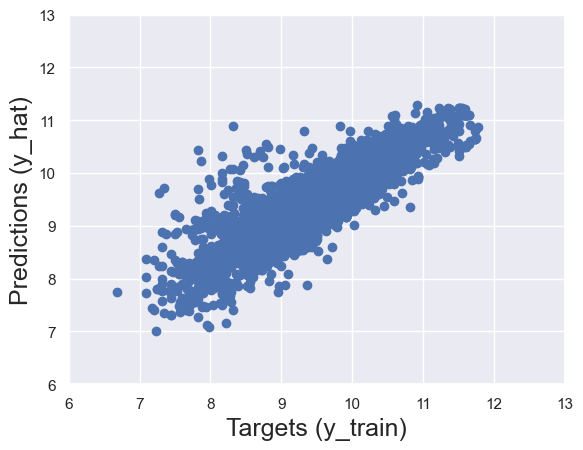

In [83]:
plot.scatter(y_train, y_hat)
plot.xlabel('Targets (y_train)', size=18)
plot.ylabel('Predictions (y_hat)', size=18)
plot.xlim(6,13)
plot.ylim(6,13)
plot.show()

C:\Users\almad\AppData\Local\Temp\ipykernel_12984\1903206420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

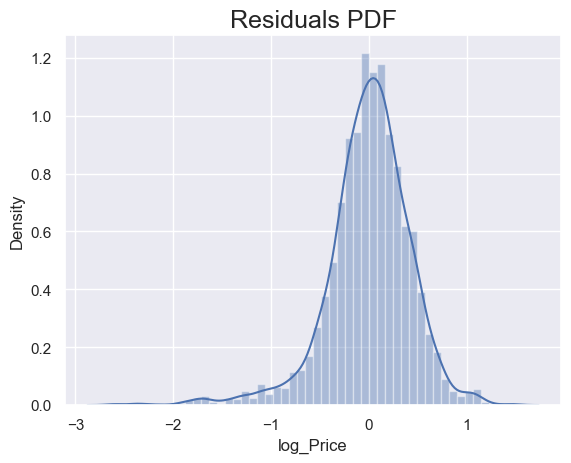

In [84]:
sns.distplot(y_train - y_hat)
plot.title("Residuals PDF", size=18)

In [85]:
reg.score(x_train,y_train)

0.7546487921881218

## Weights and Bias

In [86]:
reg.intercept_

9.421003614148074

In [87]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [88]:
summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
summary['Weights'] = reg.coef_
summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


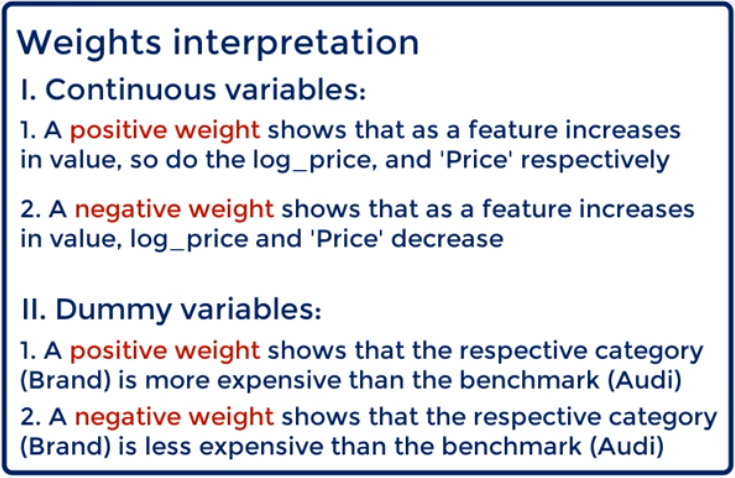

The benchmarks for dummies are:
1. Audi
2. Crossover
3. Diesel

## Testing

In [94]:
yhat_test = reg.predict(x_test)

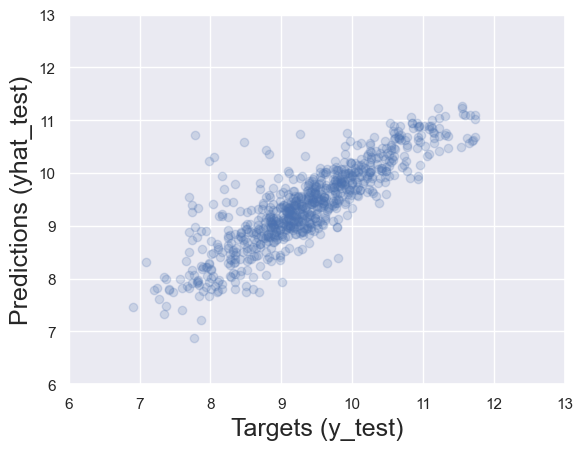

In [97]:
plot.scatter(y_test, yhat_test, alpha=0.2)
plot.xlabel('Targets (y_test)', size=18)
plot.ylabel('Predictions (yhat_test)', size=18)
plot.xlim(6,13)
plot.ylim(6,13)
plot.show()

In [101]:
#dataframe perfomance
df_pf = pd.DataFrame(np.exp(yhat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [103]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_Price, dtype: float64

In [104]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0


In [108]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference %
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [109]:
df_pf.describe()

,Predictions,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [114]:
pd.options.display.max_rows = 8
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Residual,Difference %
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
...,...,...,...,...
280,39469.51,4800.00,-34669.51,722.28
219,27632.40,2900.00,-24732.40,852.84
750,30076.59,3150.00,-26926.59,854.81
681,45259.02,2400.00,-42859.02,1785.79


In [116]:
reg.score(x_train,y_train)

0.7546487921881218